***

Assigned Students: Abbassi Yassir<br>

Professor: E. Redouane

<p style="font-size:3">$$\mathbf{CSP}$$</p>

***

_**Importing Modules**_

In [1]:
from random_csp import *
import pandas as pd
import numpy as np

from tabulate import tabulate
import matplotlib.pyplot as plt

<br><br>_**Results table as pandas DataFrame.**_

In [2]:
columns = ['instance','algorithm','p', 'nb_assigns']
Index: []

results = pd.DataFrame(columns=columns)# initialized to zeros
n ,alpha, r = 10,  0.9,  0.4

p_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for p in p_list:
    for i in range(20):
        csp = generate_csp(n, p, alpha, r)
        csp1 = copy.deepcopy(csp)
        backtracking_search(csp1)
        row_to_append = [str(p)+'-'+ str(i), 'bt', p,  csp1.nb_assigns]
        results.loc[len(results)] = row_to_append
        
        csp2 = copy.deepcopy(csp)
        forward_checking_search(csp2)
        row_to_append = [str(p)+'-'+ str(i), 'fc', p,  csp2.nb_assigns]
        results.loc[len(results)] = row_to_append
        
        csp3 = copy.deepcopy(csp)
        mac_search(csp3)
        row_to_append = [str(p)+'-'+ str(i), 'mac', p,  csp3.nb_assigns]
        results.loc[len(results)] = row_to_append

<br><br>
***

_**Creating the stats table:**_

In [3]:
# Initialize an empty DataFrame with the desired columns
stats = pd.DataFrame(columns=['P', 'Algorithm', 'Mean', 'STD'])
algorithms = ['bt', 'fc', 'mac']

for i in p_list:
    for j in algorithms:
        na = results['nb_assigns'][(results['p'] == i) & (results['algorithm'] == j)]
        
        # Computing the Mean & Standard Deviation of assignment numbers
        m = na.mean()
        s = na.std()
        
        # Append a new row to the 'stats' DataFrame using pd.concat
        new_row = pd.DataFrame({'P': [i], 'Algorithm': [j], 'Mean': [m], 'STD': [s]})
        stats = pd.concat([stats, new_row], ignore_index=True)

# Reset the index of the resulting DataFrame
stats.reset_index(drop=True, inplace=True)

<br><br>_**Plotting the results:**_

In [4]:
# Subcut the data relatively to the 'algorithm' column
sub_tbl1 = stats[results['algorithm']=='bt']
sub_tbl2 = stats[results['algorithm']=='fc']
sub_tbl3 = stats[results['algorithm']=='mac']

C:\Users\yassi\AppData\Local\Temp\ipykernel_3240\1394436242.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_tbl1 = stats[results['algorithm']=='bt']
C:\Users\yassi\AppData\Local\Temp\ipykernel_3240\1394436242.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_tbl2 = stats[results['algorithm']=='fc']
C:\Users\yassi\AppData\Local\Temp\ipykernel_3240\1394436242.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_tbl3 = stats[results['algorithm']=='mac']


<br><br>_**Backtracking Search VS Forward Checking Search:**_

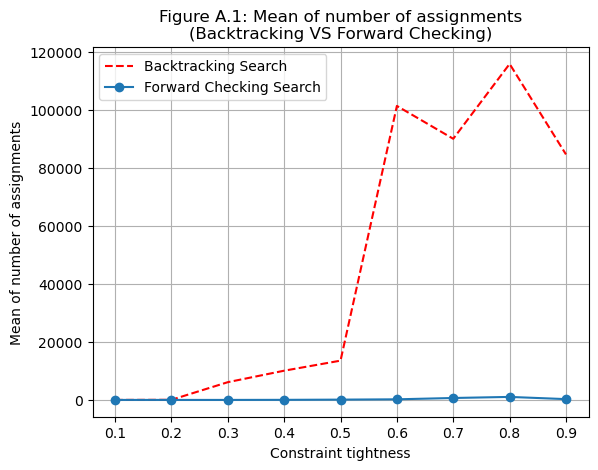

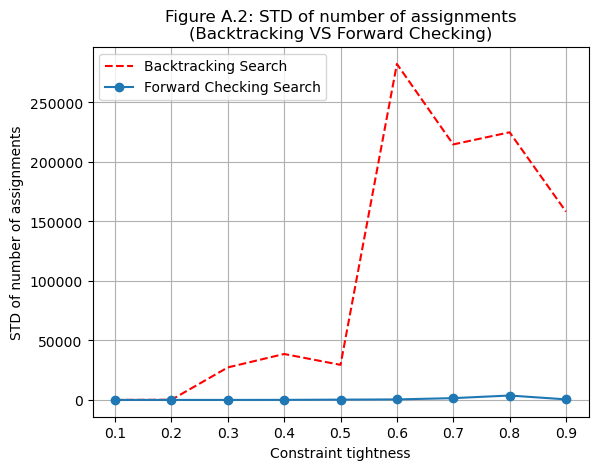

In [5]:
fig1 = plt.plot(sub_tbl1['P'], sub_tbl1['Mean'], 'r--', 
         sub_tbl2['P'], sub_tbl2['Mean'], 'o-')
plt.xlabel("Constraint tightness")
plt.ylabel("Mean of number of assignments")
plt.grid()
plt.title('Figure A.1: Mean of number of assignments\n(Backtracking VS Forward Checking)')
plt.legend(fig1,['Backtracking Search','Forward Checking Search'])
plt.savefig('Media\Figure A.1.png', bbox_inches='tight')
plt.show()

fig2 = plt.plot(sub_tbl1['P'], sub_tbl1['STD'], 'r--',
                sub_tbl2['P'], sub_tbl2['STD'], 'o-')
plt.xlabel("Constraint tightness")
plt.ylabel("STD of number of assignments")
plt.grid()
plt.title('Figure A.2: STD of number of assignments\n(Backtracking VS Forward Checking)')
plt.legend(fig2,['Backtracking Search','Forward Checking Search'])
plt.savefig('Media\Figure A.2.png', bbox_inches='tight')
plt.show()

<br><br>_**Backtracking Search VS AC-3 (Arc Consistency Algorithm):**_

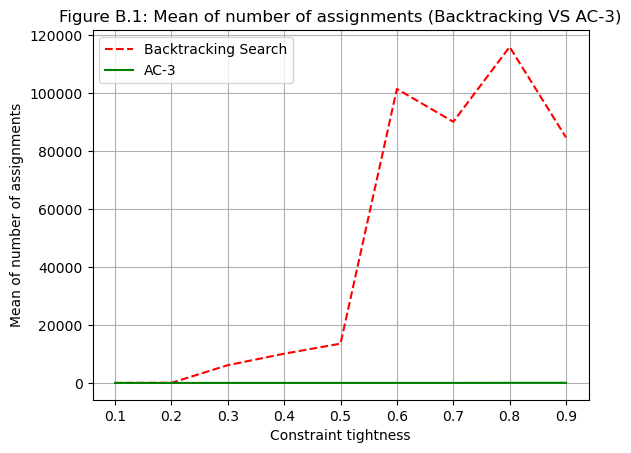

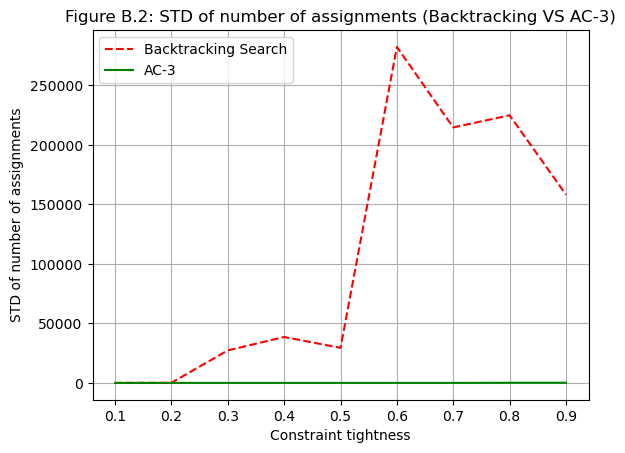

In [6]:
fig3 = plt.plot(sub_tbl1['P'], sub_tbl1['Mean'], 'r--',
         sub_tbl3['P'], sub_tbl3['Mean'], 'g-')
plt.xlabel("Constraint tightness")
plt.ylabel("Mean of number of assignments")
plt.grid()
plt.title('Figure B.1: Mean of number of assignments (Backtracking VS AC-3)')
plt.legend(fig3,['Backtracking Search','AC-3'])
plt.savefig('Media\Figure B.1.png', bbox_inches='tight')
plt.show()

fig4 = plt.plot(sub_tbl1['P'], sub_tbl1['STD'], 'r--', 
         sub_tbl3['P'], sub_tbl3['STD'], 'g-')
plt.xlabel("Constraint tightness")
plt.ylabel("STD of number of assignments")
plt.grid()
plt.title('Figure B.2: STD of number of assignments (Backtracking VS AC-3)')
plt.legend(fig4,['Backtracking Search','AC-3'])
plt.savefig('Media\Figure B.2.png', bbox_inches='tight')
plt.show()

<br><br>_**Forward Checking VS AC-3:**_

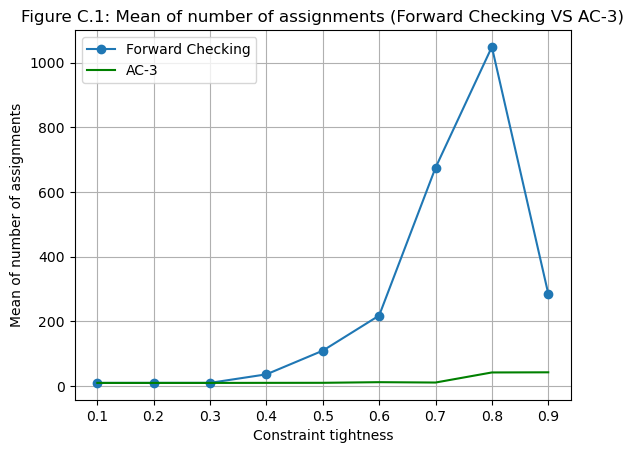

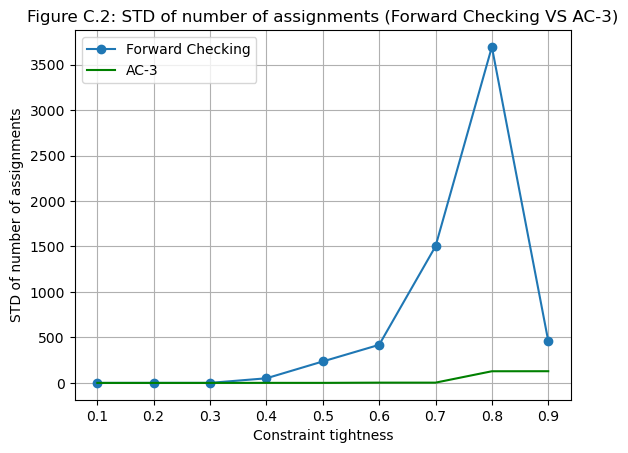

In [7]:
fig5 = plt.plot(sub_tbl2['P'], sub_tbl2['Mean'], 'o-',
         sub_tbl3['P'], sub_tbl3['Mean'], 'g-')
plt.xlabel("Constraint tightness")
plt.ylabel("Mean of number of assignments")
plt.grid()
plt.title('Figure C.1: Mean of number of assignments (Forward Checking VS AC-3)')
plt.legend(fig5,['Forward Checking','AC-3'])
plt.savefig('Media\Figure C.1.png', bbox_inches='tight')
plt.show()

fig6 = plt.plot(sub_tbl2['P'], sub_tbl2['STD'], 'o-', 
         sub_tbl3['P'], sub_tbl3['STD'], 'g-')
plt.xlabel("Constraint tightness")
plt.ylabel("STD of number of assignments")
plt.grid()
plt.title('Figure C.2: STD of number of assignments (Forward Checking VS AC-3)')
plt.legend(fig6,['Forward Checking','AC-3'])
plt.savefig('Media\Figure C.2.png', bbox_inches='tight')
plt.show()

In [8]:
stats

P Algorithm       Mean            STD
0   0.1        bt      11.75       2.099499
1   0.1        fc      10.00       0.000000
2   0.1       mac      10.00       0.000000
3   0.2        bt      47.45     131.894086
4   0.2        fc      10.10       0.307794
5   0.2       mac      10.00       0.000000
6   0.3        bt    6131.40   27317.371254
7   0.3        fc      10.15       0.366348
8   0.3       mac      10.00       0.000000
9   0.4        bt   10093.35   38595.344214
10  0.4        fc      36.55      50.948348
11  0.4       mac      10.20       0.695852
12  0.5        bt   13565.25   29461.938758
13  0.5        fc     109.70     236.031911
14  0.5       mac      10.35       0.587143
15  0.6        bt  101446.00  282374.606954
16  0.6        fc     218.25     418.666288
17  0.6       mac      12.30       3.062507
18  0.7        bt   90115.55  214725.581584
19  0.7        fc     675.25    1501.424582
20  0.7       mac      11.20       3.019237
21  0.8        bt  115942.90  224919.489529
22  0.8        fc    1048.90    3694.276297
23  0.8       mac      42.35     128.260128
24  0.9        bt   84717.20  158251.639491
25  0.9        fc     286.30     462.148313
26  0.9       mac      42.80     128.715762

In [9]:
sub_tbl3

P Algorithm   Mean         STD
2   0.1       mac  10.00    0.000000
5   0.2       mac  10.00    0.000000
8   0.3       mac  10.00    0.000000
11  0.4       mac  10.20    0.695852
14  0.5       mac  10.35    0.587143
17  0.6       mac  12.30    3.062507
20  0.7       mac  11.20    3.019237
23  0.8       mac  42.35  128.260128
26  0.9       mac  42.80  128.715762